# Example 1: Computing the spectrum for a fixed vortex sector

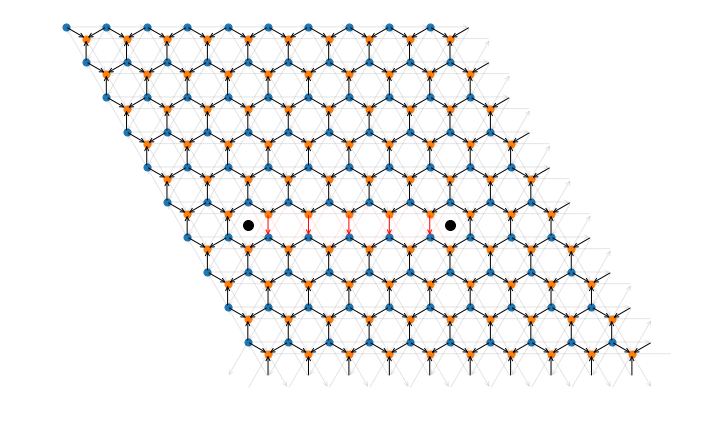

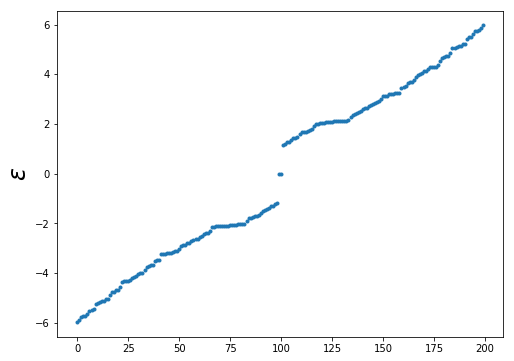

In [2]:
import numpy as np
from kithcmb import kitaevhoneycomb
from matplotlib import pyplot as plt
%matplotlib inline

# fix the parameter values and system size
J = [1,1,1]
K = 0.1
Lrows,Lcols = 10,10

# fix the values of the gauge fields. start from the no-vortex sector
ux = np.ones((Lrows,Lcols),dtype=np.int8)
uy = np.ones((Lrows,Lcols),dtype=np.int8)
uz = np.ones((Lrows,Lcols),dtype=np.int8)

# insert a pair of vortices by flipping a line of uz's
uz[Lrows//2,Lcols//4:3*Lcols//4] = -1

# initialise kitaevhoneycomb object
kh_sys = kitaevhoneycomb.kitaevhoneycomb(J=J,K=K,ux=ux,uy=uy,uz=uz) 

# (optionally) draw the system to see location of vortices, note this is slow
kh_sys.draw_system()

# obtain spectrum
spectrum = kh_sys.get_spectrum()

# plot the spectrum
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(spectrum,'.')
ax.set_ylabel(r'$\varepsilon$',fontsize=24)
plt.show()

In [15]:
%reset -f

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


# Example 2: Obtaining the correlation matrix for a fixed vortex sector

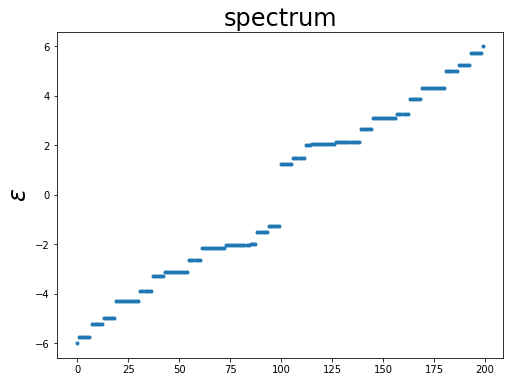


------------------------------
UNPROJECTED
------------------------------



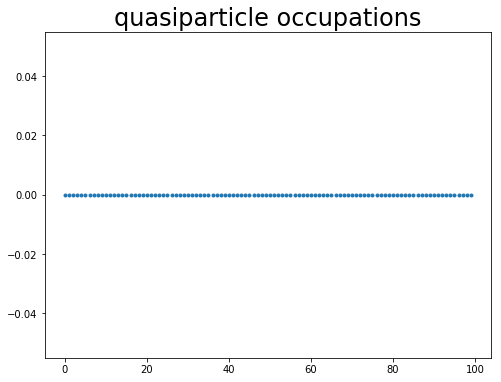

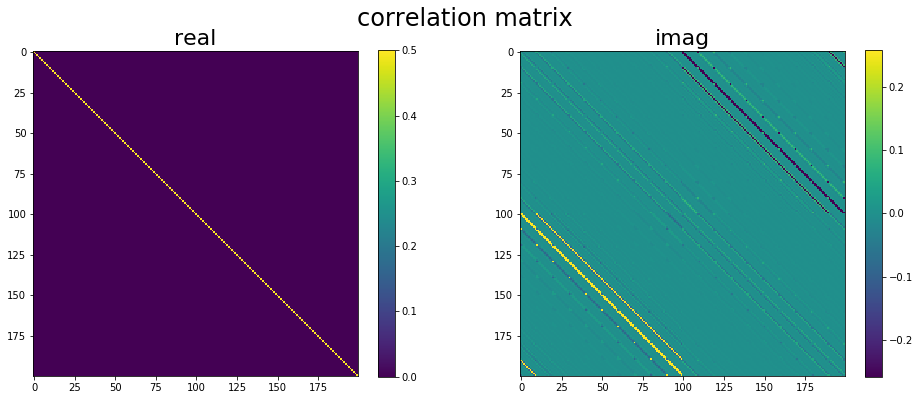


------------------------------
PROJECTED
------------------------------



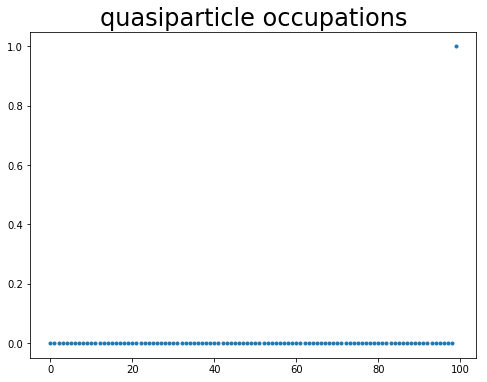

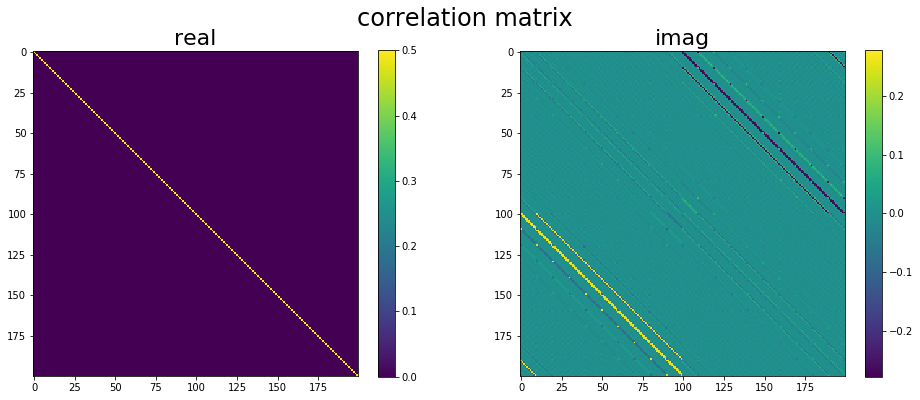

In [10]:
import numpy as np
from kithcmb import kitaevhoneycomb
from kithcmb import parityprojectedfermions
from matplotlib import pyplot as plt
%matplotlib inline

# temperature to compute correlation matrix at, set to zero
T = 0.

# fix the parameter values and system size
J = [1,1,1]
K = 0.1
Lrows,Lcols = 10,10

# fix the values of the gauge fields. start from the no-vortex sector
ux = np.ones((Lrows,Lcols),dtype=np.int8)
uy = np.ones((Lrows,Lcols),dtype=np.int8)
uz = np.ones((Lrows,Lcols),dtype=np.int8)

# go to the full vortex sector by flipping every second uz along rows
#uz[:,::2] = -1

# initialise kitaevhoneycomb object
kh_sys = kitaevhoneycomb.kitaevhoneycomb(J=J,K=K,ux=ux,uy=uy,uz=uz) 

# (optionally) draw the system to see location of vortices, note this is slow
#kh_sys.draw_system()

# obtain eigenvectors and eigenvalues of A matrix
D,U = kh_sys.get_diagonal_form()

# plot spectrum
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(np.diag(np.real(1j*D)),'.')
plt.title('spectrum',fontsize=24)
ax.set_ylabel(r'$\varepsilon$',fontsize=24)
plt.show()

# -------------
# version 1: obtain the correlation matrix WITHOUT parity constraint
# -------------
print('\n'+'-'*30+'\n'+'UNPROJECTED'+'\n'+'-'*30+'\n')
corr_mat,extras = parityprojectedfermions.get_unprojected_correlation_matrix(D,U,T)

# plot the quasipaticle occupations in extras
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(extras['quasi_occs'],'.')
plt.title('quasiparticle occupations',fontsize=24)
plt.show()

# plot real and imaginary part of correlation matrix
fig,(axl,axr) = plt.subplots(1,2,figsize=(16,6))
plt.suptitle('correlation matrix',fontsize=24)
im = axl.imshow(np.real(corr_mat))
plt.colorbar(im,ax=axl)
axl.set_title('real',fontsize=22)
im = axr.imshow(np.imag(corr_mat))
plt.colorbar(im,ax=axr)
axr.set_title('imag',fontsize=22)
plt.show()

# -------------
# version 2: obtain the correlation matrix WITH parity constraint
# -------------
print('\n'+'-'*30+'\n'+'PROJECTED'+'\n'+'-'*30+'\n')
desired_parity = parityprojectedfermions.get_desired_parity(ux=ux,uy=uy,uz=uz,U=U)
corr_mat,extras = parityprojectedfermions.get_projected_correlation_matrix(D,U,T,desired_parity)

# plot the quasipaticle occupations in extras
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(extras['quasi_occs'],'.')
plt.title('quasiparticle occupations',fontsize=24)
plt.show()

# plot real and imaginary part of correlation matrix
fig,(axl,axr) = plt.subplots(1,2,figsize=(16,6))
plt.suptitle('correlation matrix',fontsize=24)
im = axl.imshow(np.real(corr_mat))
plt.colorbar(im,ax=axl)
axl.set_title('real',fontsize=22)
im = axr.imshow(np.imag(corr_mat))
plt.colorbar(im,ax=axr)
axr.set_title('imag',fontsize=22)
plt.show()

In [2]:
%reset -f

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


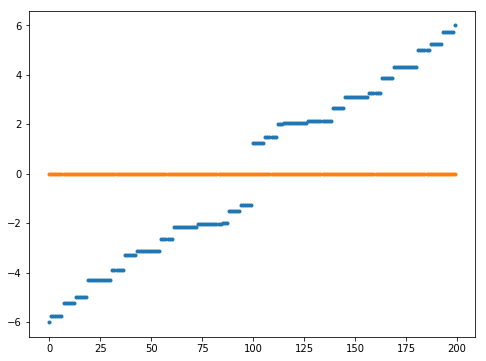

In [2]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(np.diag(np.real(1j*D)),'.')
ax.plot(np.diag(np.imag(1j*D)),'.')
plt.show()

In [3]:
len((1j*D).shape)

2

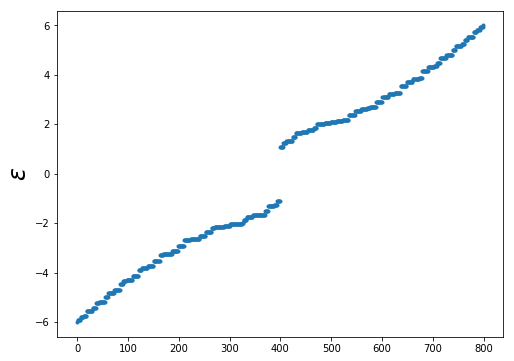

In [28]:
# fix the parameter values and system size
J = [1,1,1]
K = 0.1
Lrows,Lcols = 20,20

# fix the values of the gauge fields. start from the no-vortex sector
ux = np.ones((Lrows,Lcols),dtype=np.int8)
uy = np.ones((Lrows,Lcols),dtype=np.int8)
uz = np.ones((Lrows,Lcols),dtype=np.int8)

# go to the full vortex sector by flipping every second uz along rows
#uz[:,::2] = -1

# initialise kitaevhoneycomb object
kh_sys = kitaevhoneycomb.kitaevhoneycomb(J=J,K=K,ux=ux,uy=uy,uz=uz) 

# (optionally) draw the system to see location of vortices, note this is slow
#kh_sys.draw_system()

# obtain eigenvectors and eigenvalues of A matrix
D,U = kh_sys.get_diagonal_form()

# convert D matrix to spectrum
spectrum = np.real(1j*D)

# plot the spectrum
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(np.diag(spectrum),'.')
ax.set_ylabel(r'$\varepsilon$',fontsize=24)
plt.show()

In [33]:
# temperature to compute correlation matrix at, set to zero
T = 0.

# get the quasiparticle occupations
p_quasi_occs,extras = parityprojectedfermions.get_projected_quasiparticle_occupations(spectrum,T,-1)
u_quasi_occs,extras = parityprojectedfermions.get_unprojected_quasiparticle_occupations(spectrum,T)

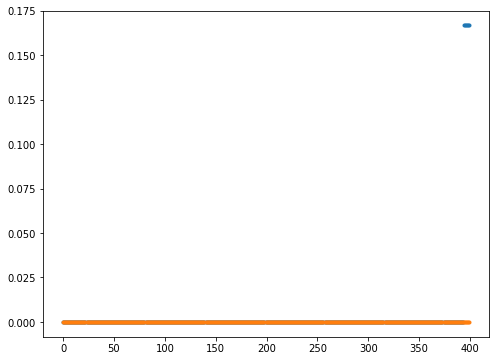

In [34]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(p_quasi_occs,'.')
ax.plot(u_quasi_occs,'.')
plt.show()

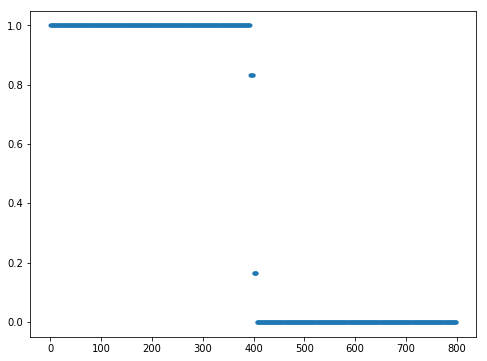

In [35]:
full_quasi_occs = np.zeros(2*p_quasi_occs.size)
full_quasi_occs[:p_quasi_occs.size] = 1-p_quasi_occs # holes
full_quasi_occs[p_quasi_occs.size:] = p_quasi_occs[::-1] # particles, in order of increasing energy

fig,ax = plt.subplots(figsize=(8,6))
ax.plot(full_quasi_occs,'.')
plt.show()

In [37]:
full_quasi_occs = np.diag(full_quasi_occs)
corr_mat = np.dot(U,np.dot(full_quasi_occs,U.conj().T))

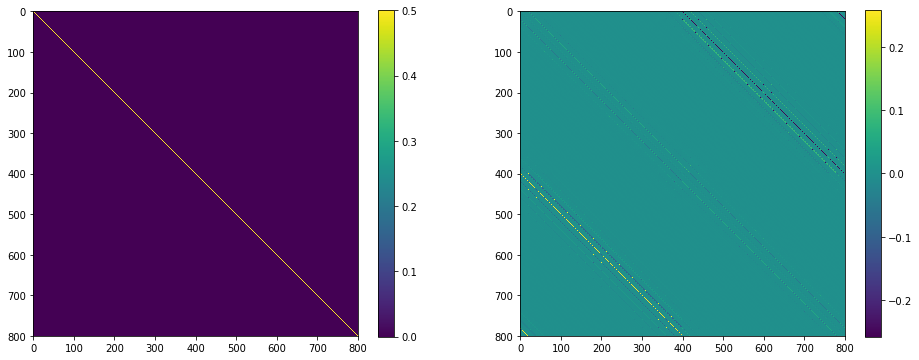

In [38]:
# plot real and imaginary part of correlation matrix
fig,(axl,axr) = plt.subplots(1,2,figsize=(16,6))
im = axl.imshow(np.real(corr_mat))
plt.colorbar(im,ax=axl)
im = axr.imshow(np.imag(corr_mat))
plt.colorbar(im,ax=axr)
plt.show()